In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("./kospi.xlsx", usecols=[0,1,2,3,4], index_col='Date')
df.head(1)

In [ ]:
# 변동 파생변수 
df['change'] = df['High'] - df['Low']
df.head(1)

In [ ]:
# 전일변동 파생변수
df['전일변동'] = df['change'].shift()
df.head()

In [ ]:
# 목표가 = 시가 + 전일변동 * 0.5
df['목표가'] = df['Open'] + df['전일변동'] * 0.5
df.head(5)

1. 목표가보다 고가가 높으면 목표가로 매수
2. 수익율 -> 종가 - 목표가 / 목표가 + 1
3. 그 외의 수익율은 1
 

In [ ]:
import numpy as np

In [ ]:
acc_rtn = 1
for i in df.index:
    
    if df.loc[i, 'High'] > df.loc[i, '목표가']:
        rtn = (df.loc[i, 'Close'] - df.loc[i, '목표가']) / df.loc[i, '목표가'] + 1
        df.loc[i, '수익율'] = rtn
    else:
        rtn = 1
        df.loc[i, '수익율'] = rtn
    
    acc_rtn *= rtn
    df.loc[i, '누적수익율'] = acc_rtn

In [ ]:
df.tail()

In [ ]:
# np.where(조건식, 참인경우 값, 거짓인 경우 값)
df['수익율2'] = np.where(df['High'] >= df['목표가'], 
                      (df['Close'] - df['목표가']) / df['목표가'] + 1, 
                        1)

In [ ]:
(df['수익율'] == df['수익율2']).value_counts()

In [19]:
# 누적수익율
# 누적곱 -> cumprod()
df['누적수익율2'] = df['수익율2'].cumprod()

In [20]:
(df['누적수익율'] == df['누적수익율2']).value_counts()

True    5349
dtype: int64

In [22]:
## CAGR -> 연복리수익율
## 누적수익율 ** (1 / (투자기간/365)) - 1
# 시계열데이터를 이용하여 기간
delta = df.index[-1] - df.index[0]
delta.days

7906

In [23]:
year = delta.days/365
CAGR = df['누적수익율'].iloc[-1] ** ( 1 / year ) - 1
print('CAGR : ', CAGR * 100)

CAGR :  7.941722848934241


In [25]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

In [ ]:
# 변동성돌파전략의 누적 수익율 라인그래프 표시 
# 바이앤홀드 누적수익율 라인 그래프 표시 

plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df['누적수익율'], label='변동성돌파')
plt.plot(df['Close'] / df['Close'].iloc[0], label='단순보유')
plt.legend()
plt.show()



In [ ]:
# DD  = (1 - 누적수익율 / 전고점) * 100
df['전고점'] = df['누적수익율'].cummax()
df['DD'] = (1 - df['누적수익율'] / df['전고점']) * 100
df.tail()

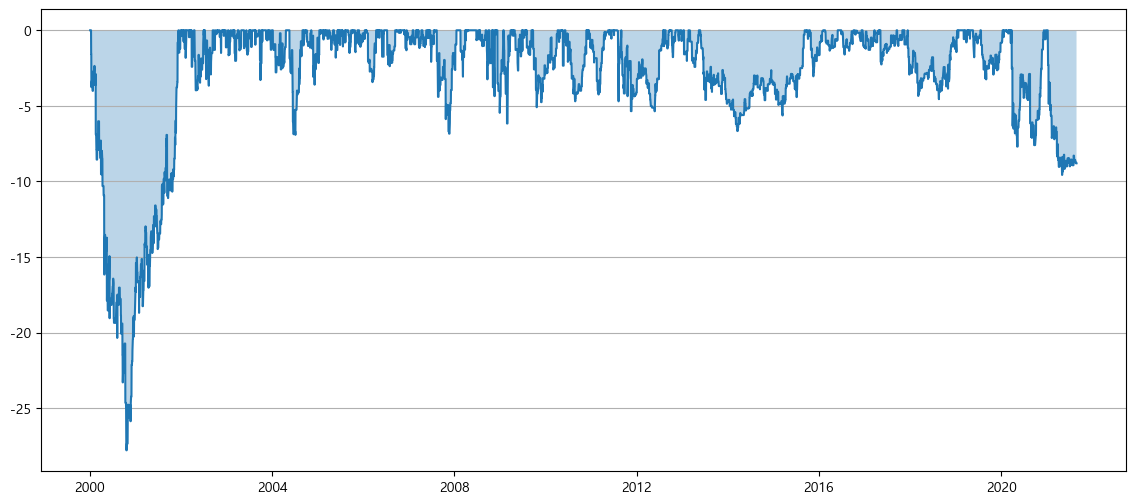

In [33]:
# 음수를 표시
plt.rc("axes", unicode_minus= False)

plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(-df['DD'])
plt.fill_between(df.index, -df['DD'], alpha=0.3)
plt.show()

In [34]:
print('MDD : ', df['DD'].max())

MDD :  27.779726849588627


In [35]:
# 이동평균선 10일치
df['MA10'] = df['Close'].rolling(10).mean()
df.iloc[8:12]

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,수익율2,누적수익율2,전고점,DD,MA10
Date,,,,,,,,,,,,,,
2000-01-14,948.03,958.82,970.59,937.75,32.84,21.48,969.560,0.977794,0.962386,0.977794,0.962386,1.0,3.761404,NaN
2000-01-17,983.27,962.67,986.09,950.75,35.34,32.84,979.090,1.004269,0.966495,1.004269,0.966495,1.0,3.350535,976.072
2000-01-18,981.53,992.31,992.85,967.96,24.89,35.34,1009.980,1.000000,0.966495,1.000000,0.966495,1.0,3.350535,968.321
2000-01-19,938.78,969.31,977.00,938.74,38.26,24.89,981.755,1.000000,0.966495,1.000000,0.966495,1.0,3.350535,963.568


In [36]:
df["매매신호"] = df['Open'] > df['MA10'].shift(1)

In [37]:
df.head()

,Close,Open,High,Low,change,전일변동,목표가,수익율,누적수익율,수익율2,누적수익율2,전고점,DD,MA10,매매신호
Date,,,,,,,,,,,,,,,
2000-01-04,1059.04,1028.33,1066.18,1016.59,49.59,NaN,NaN,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
2000-01-05,986.31,1006.87,1026.52,984.05,42.47,49.59,1031.665,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
2000-01-06,960.79,1013.95,1014.90,953.50,61.40,42.47,1035.185,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
2000-01-07,948.65,949.17,970.16,930.84,39.32,61.40,979.870,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False
2000-01-10,987.24,979.67,994.94,965.02,29.92,39.32,999.330,1.0,1.0,1.0,1.0,1.0,0.0,NaN,False


In [38]:
# 수익율 계산 방법  -> 매매신호가 1이고, 고가가 목표가보다 높은 경우
df['수익율2'] = np.where(
    (df['매매신호'] == 1) & (df['High'] >= df['목표가']), 
    df['Close'] / df['목표가'], 
    1
)

In [39]:
df['누적수익율2'] = df['수익율2'].cumprod()

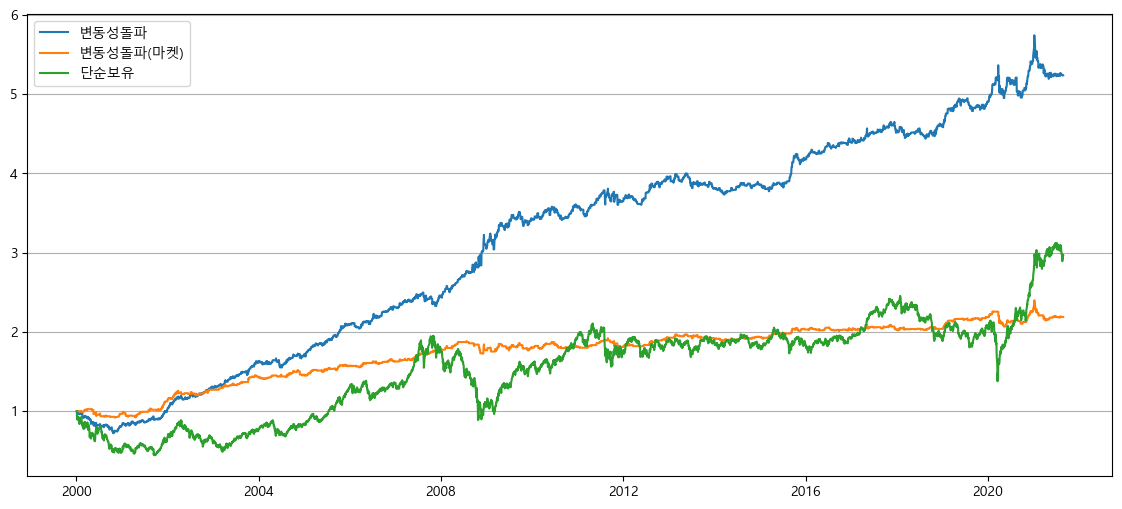

In [40]:
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(df['누적수익율'], label='변동성돌파')
plt.plot(df['누적수익율2'], label='변동성돌파(마켓)')
plt.plot(df['Close']/df['Close'].iloc[0], label = '단순보유')
plt.legend()
plt.show()

In [41]:
df['전고점2'] = df['누적수익율2'].cummax()
df['DD2'] = (1 - df['누적수익율2'] / df['전고점2']) * 100

In [42]:
print('MDD2 :', df['DD2'].max())

MDD2 : 10.556892232762005


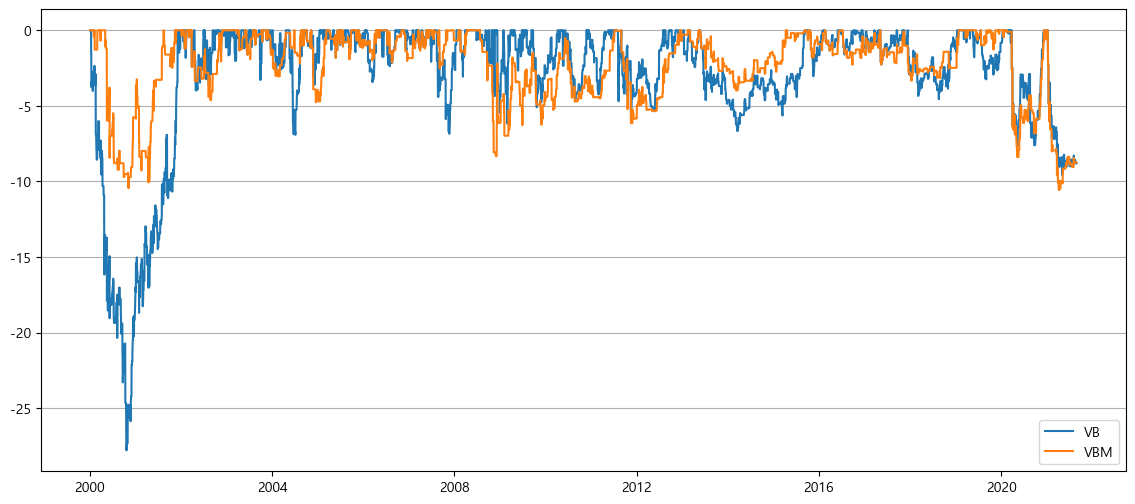

In [45]:
plt.figure(figsize=(14, 6))
plt.grid(True, axis='y')
plt.plot(-df['DD'], label='VB')
plt.plot(-df['DD2'], label='VBM')
plt.legend()
plt.show()